## Predict Category of News Using Labeled NYT Data



- Take out the rows that are in category :-  'Gen Soft', 'Misc', 'Week in Review', 'Magazine', 'Home Desk', 'Cars', 'Living', 'Personal Finance'
- Take out the rows that are shorter than 150 characters
- Stratified random sampling 7000 rows for each categories (17 categories)
- Split 80% for trained dataset and 20% for test dataset
- Feature extraction (unigram/bigram/trigram) by take out the n-grams that are occurrence less than 0.05% or greater than 50% of trained dataset
- Fit the model using LinearSVC

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../nyt_data/nyt_recode_clean.csv', nrows=10)
select_cols = "categories, OnlineMSoft, NewsDeskSoft, Publication.Date, Publication.Year, Section, Body, Lead.Paragraph, Headline, Online.Headline, Online.Lead.Paragraph, Url, Online.Section, ID"
select_cols = [c.strip() for c in select_cols.split(',')]
for c in select_cols:
    if c not in df.columns:
        print(c)

In [3]:
df = pd.read_csv('../nyt_data/nyt_recode_clean.csv', usecols=select_cols)
df.dropna(subset=['Body'], inplace=True)

/opt/venv3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,ID,Body,Headline,Lead.Paragraph,Online.Headline,Online.Lead.Paragraph,Online.Section,Publication.Date,Publication.Year,Section,Url,categories,OnlineMSoft,NewsDeskSoft
0,1,lead 3 compani report 3aar corp nyse qtr nov 3...,AAR CORP reports earnings for Qtr to Nov 30,LEAD: *3*** COMPANY REPORTS ** *3*AAR CORP (NY...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
1,2,lead 3 compani report 3american cytogenet otc ...,AMERICAN CYTOGENETICS reports earnings for Qtr...,LEAD: *3*** COMPANY REPORTS ** *3*AMERICAN CYT...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
2,3,lead 3 compani report 3appli power otc qtr nov...,APPLIED POWER reports earnings for Qtr to Nov 30,LEAD: *3*** COMPANY REPORTS ** *3*APPLIED POWE...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
3,4,lead 3 compani report 3barrett resourc otc yea...,BARRETT RESOURCES reports earnings for Year to...,LEAD: *3*** COMPANY REPORTS ** *3*BARRETT RESO...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
4,5,lead 3 compani report 3canaver intern otc year...,CANAVERAL INTERNATIONAL reports earnings for Y...,LEAD: *3*** COMPANY REPORTS ** *3*CANAVERAL IN...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
5,6,lead 3 compani report 3certron corp otc year o...,CERTRON CORP reports earnings for Year to Oct 31,LEAD: *3*** COMPANY REPORTS ** *3*CERTRON CORP...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
6,7,lead 3 compani report 3commerci metal nyse qtr...,COMMERCIAL METALS reports earnings for Qtr to ...,LEAD: *3*** COMPANY REPORTS ** *3*COMMERCIAL M...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
7,8,lead 3 compani report 3csp inc otc qtr nov 30 ...,CSP INC reports earnings for Qtr to Nov 30,LEAD: *3*** COMPANY REPORTS ** *3*CSP INC (OTC...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
8,9,lead 3 compani report 3damson oil amex qtr sep...,DAMSON OIL reports earnings for Qtr to Sept 30,LEAD: *3*** COMPANY REPORTS ** *3*DAMSON OIL (...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
9,10,lead 3 compani report 3electro audio dynam ame...,ELECTRO AUDIO DYNAMICS reports earnings for Qt...,LEAD: *3*** COMPANY REPORTS ** *3*ELECTRO AUDI...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False


In [5]:
df.groupby('categories').size()

categories
Arts                111398
Books                33029
Business Finance    344409
Cars                  2581
Classifieds         131344
Dining                9069
Editorial           132578
Foreign News        130938
Gen Soft             48196
Health                4710
Home Desk             8607
Leisure              44043
Living                6970
Local               347312
Magazine             28141
Misc                 10979
National            145696
Obits                20088
Personal Finance      1045
Real Estate          18159
Science              14008
Sports              176497
Style                35636
Travel               27562
Week in Review       23521
dtype: int64

### Let all other categories ==> Other

In [6]:
df.loc[df.categories.isnull() | df.categories.isin(['Gen Soft', 'Misc', 'Week in Review', 'Magazine', 'Home Desk', 'Cars', 'Living', 'Personal Finance']), 'categories'] = 'Other'

In [7]:
df.groupby('categories').size()

categories
Arts                111398
Books                33029
Business Finance    344409
Classifieds         131344
Dining                9069
Editorial           132578
Foreign News        130938
Health                4710
Leisure              44043
Local               347312
National            145696
Obits                20088
Other               143886
Real Estate          18159
Science              14008
Sports              176497
Style                35636
Travel               27562
dtype: int64

In [8]:
pd.set_option('max_colwidth', 120)
df[df.Body.str.len() < 150][['Body', 'Url']]

,Body,Url
540,lead better 86 presid reagan ask new year 161 better 86 presid reagan ask new year 161,http://query.nytimes.com/gst/fullpage.html?res=9B0DEFD91738F930A35752C0A961948260
900,lead freshmen athlet elig elig judith dorphley upper montclair nj freshmen athlet elig elig judith dorphley upper mo...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE5DD1E3BF937A35752C0A961948260
1232,lead malici fire arson secretari justic hector rivera cruz puerto rico a16 malici fire arson secretari justic hector...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DC153DF936A35752C0A961948260
1388,lead branch rockefel center christma tree cut tree taken yesterday ap branch rockefel center christma tree cut tree ...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DB123FF935A35752C0A961948260
1486,lead hedi halpert name presid bmt public divis tribuneswabfox compani hedi halpert name presid bmt public divis trib...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DD143EF935A35752C0A961948260
1502,lead 382 minut play time season manut bol washington bullet assist 382 minut play time season manut bol washington b...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE5D7113EF935A35752C0A961948260
1769,lead gener assembl special committe apartheid 3 pm gener assembl special committe apartheid 3 pm,http://query.nytimes.com/gst/fullpage.html?res=9B0DE3DB1738F93BA35752C0A961948260
2170,lead gener assembl council namibia 1030 gener assembl council namibia 1030,http://query.nytimes.com/gst/fullpage.html?res=9B0DE7DD123CF93AA35752C0A961948260
2416,lead bullish employ report jay n woodworth banker trust compani 501 bullish employ report jay n woodworth banker tru...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE4DC1F31F933A25752C0A961948260
3074,lead come societi cope problem naomi levin nyu come societi cope problem naomi levin nyu vice presid drug washington...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE1D9153BF931A25752C0A961948260


### Take out the Body text shorter than 150 characters

In [9]:
df = df[df.Body.str.len() > 150]
df.groupby(['categories']).size()

categories
Arts                109614
Books                32788
Business Finance    336024
Classifieds         107555
Dining                8917
Editorial           131734
Foreign News        125306
Health                4709
Leisure              43740
Local               318471
National            139573
Obits                20086
Other               139631
Real Estate          17786
Science              13822
Sports              173102
Style                33631
Travel               26613
dtype: int64

In [10]:
import time
import re
import string

import numpy as np
import nltk
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize_with_punc(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

with open('../roberts_rules/all_text.txt', 'rt') as f:
    text = f.read()
text = re.sub(r'\d+', '', text)

vect = CountVectorizer(tokenizer=tokenize, stop_words='english', ngram_range=(2, 3)) 
vect.fit([text])
roberts_rules = set(vect.get_feature_names())


def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)

def most_informative_feature_for_class_svm(vectorizer, classifier,  n=10):
    labelid = 3 # this is the coef we're interested in. 
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    topn = sorted(zip(svm_coef[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(feat, coef)
        
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              " | ".join(feature_names[j] for j in top10)))

def get_top_features(vectorizer, clf, class_labels, n=20):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    top_features = {}
    for i, class_label in enumerate(class_labels):
        topN = np.argsort(clf.coef_[i])[-n:]
        top_features[class_label] = [feature_names[j] for j in topN][::-1]
    return top_features

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-20s\t\t%.4f\t%-20s" % (coef_1, fn_1, coef_2, fn_2))

def get_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top_a = coefs_with_fns[:n]
    top_b = coefs_with_fns[:-(n + 1):-1]
    return top_a, top_b

/opt/venv3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  sorted(in

### Stratified Sampling

In [11]:
#SAMPLE_SIZE_PER_CAT = 4000 ==> 0.85
#SAMPLE_SIZE_PER_CAT = 6000 ==> 0.86
SAMPLE_SIZE_PER_CAT = 7000
sdf = pd.DataFrame()
for c in df.categories.unique():
    sdf = sdf.append(df[df.categories == c].sample(SAMPLE_SIZE_PER_CAT, random_state=21, replace=True))

In [12]:
sdf.groupby(['categories']).size()

categories
Arts                7000
Books               7000
Business Finance    7000
Classifieds         7000
Dining              7000
Editorial           7000
Foreign News        7000
Health              7000
Leisure             7000
Local               7000
National            7000
Obits               7000
Other               7000
Real Estate         7000
Science             7000
Sports              7000
Style               7000
Travel              7000
dtype: int64

In [13]:
X = sdf.Body
y = sdf.categories

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [14]:
vect = CountVectorizer(ngram_range=(1, 3), min_df=0.0005, max_df=0.5) 

In [15]:
X_train = vect.fit_transform(X_train)
transformer = TfidfTransformer()
X_train = transformer.fit_transform(X_train)

In [16]:
X_test = vect.transform(X_test)
transformer = TfidfTransformer()
X_test = transformer.fit_transform(X_test)

In [17]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

est = LinearSVC(penalty='l1', dual=False, tol=1e-3)

# Calibrated with isotonic calibration
clf = CalibratedClassifierCV(est, cv=2, method='isotonic')

t0 = time.time()
clf.fit(X_train, y_train)
t1 = time.time()
y_pred = clf.predict(X_test)
t2 = time.time()
time_clf_train = t1-t0
time_clf_predict = t2-t1
print("Results for classifier")
print("Training time: %fs; Prediction time: %fs" % (time_clf_train, time_clf_predict))
print(classification_report(y_test, y_pred))

Results for classifier
Training time: 411.767647s; Prediction time: 0.655514s
                  precision    recall  f1-score   support

            Arts       0.64      0.68      0.66      1400
           Books       0.89      0.94      0.92      1400
Business Finance       0.88      0.86      0.87      1400
     Classifieds       0.98      0.99      0.99      1400
          Dining       0.88      0.96      0.92      1400
       Editorial       0.81      0.80      0.81      1400
    Foreign News       0.82      0.88      0.85      1400
          Health       0.84      0.92      0.88      1400
         Leisure       0.80      0.74      0.77      1400
           Local       0.74      0.64      0.69      1400
        National       0.73      0.69      0.71      1400
           Obits       0.92      0.97      0.94      1400
           Other       0.74      0.48      0.58      1400
     Real Estate       0.89      0.95      0.92      1400
         Science       0.79      0.83      0.81    

In [18]:
f1_score(y_test, y_pred, average='macro')

0.827196153474691

In [19]:
len(vect.vocabulary_)

82789

In [44]:
# FIXME: Only for first fold of cross validation
most_informative_feature_for_class(vect, clf.calibrated_classifiers_[0].base_estimator, 'Arts')

Arts channel 13 3.548436648468718
Arts shattuck 3.6186951287605456
Arts tonight 10 3.650258283455467
Arts boxoffic 3.670478868177785
Arts take children 4.05393458556254
Arts thursday night 4.175983872241461
Arts canbi 5.260127362623003
Arts lawrenc van gelder 5.3658321632045825
Arts televis review 12.24593971668317
Arts book time 14.406799481867218


In [46]:
print_top10(vect, clf.calibrated_classifiers_[0].base_estimator, clf.classes_)

Arts: channel 13 | shattuck | tonight 10 | boxoffic | take children | thursday night | canbi | lawrenc van gelder | televis review | book time
Books: 2395 | nonfict | review | week list | unpag | book brief | 2495 | editor review | pp new | pp
Business Finance: trade commiss | media busi advertis | plc | republish | world busi | ago prime rate | busi travel | compani report | media busi | compani news
Classifieds: greatli miss | memori servic | memori mass | ct | mourn | friend | surviv | grandchildren | servic held | belov
Dining: last wednesday | extra virgin oliv | winemak | price rang appet | eat well | marian burro | florenc fabric | addit capsul | wine talk | food stuff
Editorial: forthcom | maureen dowd | rightli | week review | ope columnist | editori | ope contributor | front page | news articl | ope
Foreign News: iraq war | staterun | american offici | threat respons | shantytown | servic member die | diplomat said | today | struggl iraq | nyt
Health: mri | person health | bm

In [47]:
top_features = get_top_features(vect, clf.calibrated_classifiers_[0].base_estimator, clf.classes_, n=100)
top_features_df = pd.DataFrame(top_features)
top_features_df.to_csv('./output-svc/reports/categories_top100_other_calibrated.csv', index=False)
top_features_df

,Arts,Books,Business Finance,Classifieds,Dining,Editorial,Foreign News,Health,Leisure,Local,National,Obits,Other,Real Estate,Science,Sports,Style,Travel
0,book time,pp,compani news,belov,food stuff,ope,nyt,vital sign,tv weekend,neighborhood report,washington talk brief,die yesterday,news watch,re think live,claiborn ray,sport editor,consum world,travel advisori
1,televis review,pp new,media busi,servic held,wine talk,news articl,struggl iraq,book health,art review,excel good,follow excerpt,year old,way live,hw,scienc watch,sport peopl,ego id,practic travel
2,lawrenc van gelder,editor review,compani report,grandchildren,addit capsul,front page,today,anahad oconnor,street soho,next sunday,washington talk,year old mr,weddingscelebr,streetscap,question scienc,writer name,nadin brozan,correspond report
3,canbi,2495,busi travel,surviv,florenc fabric,ope contributor,diplomat said,lead author,lunch noon,total time,2004 campaign,die,marri yesterday,nation perspect,editor,nba,puls,lead editor
4,thursday night,book brief,ago prime rate,friend,marian burro,editori,servic member die,room bedroom,ken johnson,neediest case,gov,heart attack said,four serv,garag tax,editor re,mr bennett,person shopper,new york ny
5,take children,unpag,world busi,mourn,eat well,ope columnist,shantytown,coauthor studi,open today,worth note,last resort,die tuesday,home section,walkup,current issu,ioc,even hour,fare countri
6,boxoffic,week list,republish,ct,price rang appet,week review,threat respons,anahad,photographi review,town board,said thursday,year old live,amc,per squar foot,empath,track field,sunday dinner,last friday
7,tonight 10,review,plc,memori mass,winemak,rightli,american offici,bmj,book time,extravirgin,report photograph,die sunday,beleagu,manhattan writer,york writer,atlant salmon,current,travel
8,shattuck,nonfict,media busi advertis,memori servic,extra virgin oliv,maureen dowd,staterun,person health,film review,pataki said,pennsylvania avenu,die monday,bridegroom,coop,electron mail,intern box,chronicl,editor
9,channel 13,2395,trade commiss,greatli miss,last wednesday,forthcom,iraq war,mri,holland cotter,good eat,articl page,caus,ethicist,homeown,scienc time,told,elain louie,second home


In [48]:
joblib.dump(vect, "./output-svc/models/categories_vec_count_nyt_23gram_other_calibrated.joblib")
joblib.dump(clf, "./output-svc/models/categories_nyt_model_other_calibrated.joblib")

['./output-svc/models/categories_nyt_model_other_calibrated.joblib']

In [50]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['true_value']
y_test_df.reset_index(drop=True, inplace=True)

if hasattr(clf, "predict_proba"):
    prob = clf.predict_proba(X_test)
else:  # use decision function
    prob = clf.decision_function(X_test)
    prob = \
        (prob - prob.min()) / (prob.max() - prob.min())
prob_df = pd.DataFrame(prob)
columns = []
for c in clf.classes_:
    columns.append(c)
prob_df.columns = columns
result_df = pd.concat([y_test_df[['true_value']], prob_df], axis=1)
result_df.to_csv('./output-svc/tests/categories_test_prediction_other_calibrated.csv', index=False)
result_df

,true_value,Arts,Books,Business Finance,Classifieds,Dining,Editorial,Foreign News,Health,Leisure,Local,National,Obits,Other,Real Estate,Science,Sports,Style,Travel
0,Books,0.017431,0.227264,0.002544,0.000000,0.000813,0.683516,0.000266,0.000137,0.001182,0.003857,0.000712,0.000044,0.033010,0.000414,0.024190,0.000184,0.003754,0.000682
1,Editorial,0.001632,0.000254,0.012955,0.000047,0.000949,0.967273,0.001445,0.000120,0.000975,0.002019,0.006767,0.000000,0.003815,0.000000,0.000000,0.000196,0.001553,0.000000
2,Real Estate,0.007178,0.000086,0.001222,0.000000,0.006554,0.000603,0.020732,0.000102,0.001729,0.020325,0.003596,0.000149,0.006400,0.906978,0.000000,0.000000,0.024346,0.000000
3,Dining,0.013527,0.001929,0.002240,0.000568,0.702178,0.014182,0.005669,0.012210,0.002433,0.003017,0.005410,0.000057,0.140545,0.000760,0.037748,0.003018,0.049594,0.004914
4,Science,0.039874,0.001514,0.000728,0.000000,0.000184,0.059232,0.000286,0.006304,0.012701,0.006114,0.001849,0.000000,0.083269,0.000686,0.780948,0.000370,0.003006,0.002935
5,Style,0.162490,0.000218,0.002125,0.000000,0.290832,0.000632,0.191725,0.000406,0.084214,0.030392,0.018413,0.007085,0.026984,0.000000,0.000000,0.000242,0.046784,0.137455
6,Travel,0.000218,0.000750,0.001308,0.000172,0.000000,0.009156,0.000110,0.002510,0.000338,0.004283,0.002696,0.000140,0.003850,0.000000,0.000522,0.000194,0.003308,0.970443
7,Arts,0.289702,0.000157,0.000907,0.000000,0.000451,0.003613,0.000128,0.001456,0.662677,0.016747,0.001048,0.000000,0.019303,0.000152,0.000242,0.000059,0.002868,0.000489
8,Leisure,0.132419,0.000172,0.001204,0.000000,0.000656,0.000674,0.000466,0.000516,0.849648,0.003381,0.001197,0.000127,0.008071,0.000123,0.000497,0.000169,0.000256,0.000425
9,Dining,0.001633,0.031441,0.002501,0.000024,0.843433,0.000563,0.000768,0.019174,0.003268,0.009285,0.001846,0.000173,0.077250,0.000089,0.000554,0.000195,0.001378,0.006424


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_confusion import ConfusionMatrix

y_true = y_test.reset_index(drop=True)
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted         Arts  Books  Business Finance  Classifieds  Dining  \
Actual                                                                 
Arts               958     49                 9            6       2   
Books               11   1322                 2            0       3   
Business Finance     5      0              1208            0       5   
Classifieds          0      0                 0         1390       0   
Dining               3      1                 0            0    1345   
Editorial           14     14                18            1       2   
Foreign News        12      1                15            0       3   
Health               1      1                 3            0       6   
Leisure            265     13                 1            0      21   
Local               58      8                23            4      37   
National            17      3                37            4       3   
Obits                8      0                 

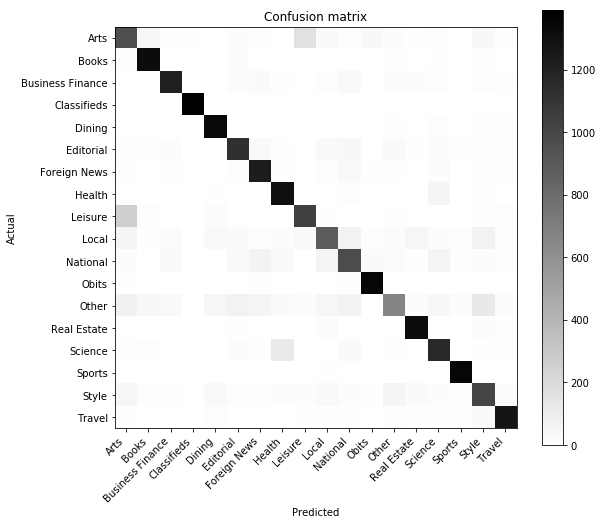

In [52]:
confusion_matrix.plot()

In [53]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true, y_pred)
conf_df = pd.DataFrame(conf)
conf_df.columns = clf.classes_
conf_df.index = clf.classes_
conf_df.to_csv('./output-svc/reports/categories_test_confusion_matrix_other_calibrated.csv', index_label="actual \ predicted")
print(conf_df)

                  Arts  Books  Business Finance  Classifieds  Dining  \
Arts               958     49                 9            6       2   
Books               11   1322                 2            0       3   
Business Finance     5      0              1208            0       5   
Classifieds          0      0                 0         1390       0   
Dining               3      1                 0            0    1345   
Editorial           14     14                18            1       2   
Foreign News        12      1                15            0       3   
Health               1      1                 3            0       6   
Leisure            265     13                 1            0      21   
Local               58      8                23            4      37   
National            17      3                37            4       3   
Obits                8      0                 1            1       1   
Other               79     39                38            3    